In [1]:
import keras

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


# The MNIST data

The keras library can download the MNIST data directly and provides a function to give us both the training and test images and the corresponding digits.

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

5


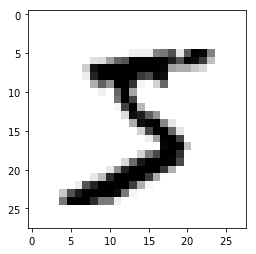

In [6]:
plt.imshow(X_train[0], cmap="gray_r")
print(y_train[0])

one thing we will do is convert the output to an array that matches what we expect the output of the neural network to be.  keras includes routines to categorize data.

In [7]:
from keras.utils import np_utils

In [8]:
np_utils.to_categorical(y_train[0], 10)

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32)

## Preparing the Data

We'll scale the image data to fall in [0, 1) and the numerical output to be categorized as an array.  Finally, we need the input data to be one-dimensional, so we fill flatten the 28x28 images into a single 784 vector.

In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

In [10]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# Build the Neural Network

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop


We'll use the _rectified linear unit_ activation function (see http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#relu)

In [12]:
model = Sequential()
model.add(Dense(500, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))

Let's look at the network

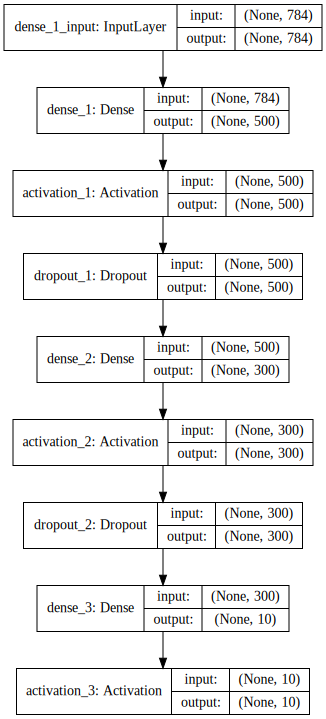

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [22]:
rms = RMSprop()
model.compile(loss='categorical_crossentropy',
              optimizer=rms, metrics=['accuracy'])

## Train

In [23]:
epochs = 10
batch = 256
model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
          validation_data=(X_test, y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.3600 - acc: 0.8895 - val_loss: 0.1484 - val_acc: 0.9548
Epoch 2/10
 - 5s - loss: 0.1540 - acc: 0.9539 - val_loss: 0.0973 - val_acc: 0.9695
Epoch 3/10
 - 5s - loss: 0.1122 - acc: 0.9654 - val_loss: 0.0944 - val_acc: 0.9711
Epoch 4/10
 - 6s - loss: 0.0955 - acc: 0.9715 - val_loss: 0.0727 - val_acc: 0.9763
Epoch 5/10
 - 6s - loss: 0.0828 - acc: 0.9745 - val_loss: 0.0698 - val_acc: 0.9782
Epoch 6/10
 - 6s - loss: 0.0706 - acc: 0.9789 - val_loss: 0.0685 - val_acc: 0.9804
Epoch 7/10
 - 5s - loss: 0.0643 - acc: 0.9803 - val_loss: 0.0696 - val_acc: 0.9795
Epoch 8/10
 - 5s - loss: 0.0571 - acc: 0.9822 - val_loss: 0.0678 - val_acc: 0.9814
Epoch 9/10
 - 5s - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0717 - val_acc: 0.9807
Epoch 10/10
 - 5s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0695 - val_acc: 0.9818


## Test

In [24]:
score = model.evaluate(X_test, y_test, batch_size=16)
print(score)

10000/10000 [==============================] - 2s 186us/step
[0.069534966812383706, 0.98180000000000001]
